## Análisis Exploratorio de datos

Laura Loaiza Palacio
- Dataset de una empresa Papelera del Valle. 

### 1. Exploración de un dataset. 

### 1. Contexto del análisis: 

Una empresa papelera del Valle desea conocer la eficiencia operativa de uno de sus molinos (Molino 3), la planta de producción trabaja con pulpa pura, pero, sin embargo, varios días al mes se le adiciona pulpa destintada, es decir  papel reciclado como cuadernos, cartón, cartulina, etc, para producir sus distintos productos. Aunque la pulpa destintada se adiciona algunos días al mes, se ven afectadas algunas variables dentro del proceso de producción del papel, por lo tanto, genera pérdidas en tiempo, en recursos y en producción dentro de la empresa. En este dataset se encuentran los datos tomados en los últimos 5 meses, desde el mes de octubre. 

### 2. Pregunta SMART: 

- Se desea conocer la eficiencia por día de la máquina, teniendo en cuenta la producción real vs la producción estimada, donde se encuentre la relación de la cantidad de papel perdido por minuto o segundo. 
- En algunos casos la baja producción no está relacionada directamente con la pérdida de tiempo, sino por rechazos en la calidad del papel, se desea encontrar las variables que afecten este proceso. 
- Medir la eficiencia operativa del Molino 3, teniendo en cuenta algunas variables dadas, explorar posibles relaciones. 

### 3. Descripción de los datos, incluyendo para cada columna: 
- Fecha: Variable cuantitativa continua. Es importante, ya que indica la fecha exacta de determinada producción. 
- Velocidad de maquina (ft): Variable cuantitativa continua 
- Producción estimada/dia (Kg): Variable cuantitativa continua, sirve como parametro para evaluar la producción real
- Producción real / dia (Kg): Variable cuantitativa continua, es una variable importante para determinar la eficiencia. 
- Tiempo perdido (min): Variable cuantitativa continua, es una variable importante para determinar las pérdidas en producción.
- pH Caja de maquina (-): Variable cuantitativa continua, pH del agua, variable química importante para conocer retrasos en los procesos.
- Valor min PH: Variable cuantitativa discreta, parametro para evaluar el pH del agua
- Valor max PH: Variable cuantitativa discreta,parametro para evaluar el pH del agua.
- Calificación PH: Variable cualitativa ordinal, es importante para determinar si se acepta o rechaza un proceso. 
- SST en aguas residuales (mg/L): Solidos en suspensión totales (miden la calidad del agua), Variable cuantitativa continua, variable química importante para conocer retrasos en los procesos.
- Valor min SST: : cuantitativa discreta, parametro para evaluar los SST
- Valor max SST: cuantitativa discreta, parametro para evaluar los SST
- Calificación SST: Variable cualitativa ordinal, es importante para determinar si se acepta o rechaza un proceso. 
- Alcalinidad de maquina (mg/L): variable química importante para conocer retrasos en los procesos.
- Valor min AL: cuantitativa discreta, parametro para evaluar la alcalinidad. 
- Valor max AL : cuantitativa discreta, parametro para evaluar la alcalinidad.
- Calificación AL: Variable cualitativa ordinal, es importante para determinar si se acepta o rechaza un proceso.
- %Fibra_destintada: Variable cuantitativa continua, porcentaje de materiales reciclados que se le adicionan al molino. 
- %Pulpa_pura: variable cuantitativa continua, porcetaje de pulpa pura que se adiciona al molino. 

### 4. Análisis general del dataset:

- Forma y tamaño del dataset

- Evaluación de los nombres de las variables

- Revisión de los tipos de variables




In [38]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import norm ## distribución normal
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import t ## distribución t
from scipy.stats import f ## distribución F
from scipy.stats import ttest_1samp  ## Prueba t una población
from scipy.stats import ttest_ind ## Prueba t comparación medias
from scipy.stats import shapiro ## Prueba normalidad Shapiro-Wilks
from scipy.stats import anderson ## Prueba normalidad Anderson-Darling
from scipy.stats import levene ## Prueba homogeneidad de varianzas Levene
from scipy.stats import mannwhitneyu ## Prueba Mann-Whitney-Wilcoxon (comparación dos poblaciones)
from scipy.stats import f_oneway ## Prueba ANOVA de una vía
from scipy.stats import chi2_contingency ## Prueba chi cuadrado de Pearson
from scipy.stats import pearsonr ## Coeficiente de correlación de Pearson con prueba
import statsmodels.stats as sm  ## estadísticas
import statsmodels.api as sm1  ## estadísticas
from statsmodels.graphics.gofplots import qqplot ## Gráfico QQ plot
import pingouin as pg ## LIbrería funciones estadísticasimport matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas



In [22]:

databa = pd.read_excel('BD CONSOLIDADO (1).xlsx')


In [23]:
headers = ['Fecha', 'Velocidad de maquina (ft)', 'Producción estimada/dia (Kg)', 'Producción real / dia (Kg)', 'Tiempo perdido (min)', 'pH Caja de maquina (-)', 'Valor min PH', 'Valor max PH', 'Calificación PH', 'SST en aguas residuales (mg/L)', 'Valor min SST', 'Valor max SST', 'Calificación SST', 'Alcalinidad de maquina (mg/L)', 'Valor min AL','Valor max AL', 'Calificación AL','%Fibra_destintada','%Pulpa_pura']

In [24]:
databa.columns=headers
databa.head()

,Fecha,Velocidad de maquina (ft),Producción estimada/dia (Kg),Producción real / dia (Kg),Tiempo perdido (min),pH Caja de maquina (-),Valor min PH,Valor max PH,Calificación PH,SST en aguas residuales (mg/L),Valor min SST,Valor max SST,Calificación SST,Alcalinidad de maquina (mg/L),Valor min AL,Valor max AL,Calificación AL,%Fibra_destintada,%Pulpa_pura
0,2022-10-01,5600,98560.0,84501,1.511,7.51,7.1,7.5,Fuera de rango,160.0,150,450,En rango,178.60,230,450,Fuera de rango,0.40,0.60
1,2022-10-02,5600,98560.0,78900,131.438,7.50,7.1,7.5,Fuera de rango,121.0,150,450,Fuera de rango,180.00,230,450,Fuera de rango,0.45,0.55
2,2022-10-03,5600,98560.0,80643,0.787,7.52,7.1,7.5,Fuera de rango,221.0,150,450,En rango,215.40,230,450,Fuera de rango,0.40,0.60
3,2022-10-04,5600,98560.0,83627,1.100,7.56,7.1,7.5,Fuera de rango,164.0,150,450,En rango,182.40,230,450,Fuera de rango,0.40,0.60
4,2022-10-05,5600,98560.0,82951,0.984,7.58,7.1,7.5,Fuera de rango,169.0,150,450,En rango,209.72,230,450,Fuera de rango,0.40,0.60


In [25]:
databa.shape

(152, 19)

La base de datos tiene 152 filas y 19 columnas

In [26]:
databa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Fecha                           152 non-null    datetime64[ns]
 1   Velocidad de maquina (ft)       152 non-null    int64         
 2   Producción estimada/dia (Kg)    152 non-null    float64       
 3   Producción real / dia (Kg)      152 non-null    int64         
 4   Tiempo perdido (min)            152 non-null    float64       
 5   pH Caja de maquina (-)          152 non-null    float64       
 6   Valor min PH                    152 non-null    float64       
 7   Valor max PH                    152 non-null    float64       
 8   Calificación PH                 152 non-null    object        
 9   SST en aguas residuales (mg/L)  152 non-null    float64       
 10  Valor min SST                   152 non-null    int64         
 11  Valor 

El tipo de variables dentro de la base de datos es correcta. 

### 5. Análisis Univariado:
- Identificar Valores Nulos

- Analizar los Valores únicos de las variables discretas

- Analizar la distribución de las variables continuas

- Evaluar la necesidad de usar Label encoding y/o hot-encoding

In [27]:
databa.isna().sum()

Fecha                             0
Velocidad de maquina (ft)         0
Producción estimada/dia (Kg)      0
Producción real / dia (Kg)        0
Tiempo perdido (min)              0
pH Caja de maquina (-)            0
Valor min PH                      0
Valor max PH                      0
Calificación PH                   0
SST en aguas residuales (mg/L)    0
Valor min SST                     0
Valor max SST                     0
Calificación SST                  0
Alcalinidad de maquina (mg/L)     0
Valor min AL                      0
Valor max AL                      0
Calificación AL                   0
%Fibra_destintada                 0
%Pulpa_pura                       0
dtype: int64

In [28]:
missing_data = databa.isnull()
missing_data.head(5)

,Fecha,Velocidad de maquina (ft),Producción estimada/dia (Kg),Producción real / dia (Kg),Tiempo perdido (min),pH Caja de maquina (-),Valor min PH,Valor max PH,Calificación PH,SST en aguas residuales (mg/L),Valor min SST,Valor max SST,Calificación SST,Alcalinidad de maquina (mg/L),Valor min AL,Valor max AL,Calificación AL,%Fibra_destintada,%Pulpa_pura
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
databa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Fecha                           152 non-null    datetime64[ns]
 1   Velocidad de maquina (ft)       152 non-null    int64         
 2   Producción estimada/dia (Kg)    152 non-null    float64       
 3   Producción real / dia (Kg)      152 non-null    int64         
 4   Tiempo perdido (min)            152 non-null    float64       
 5   pH Caja de maquina (-)          152 non-null    float64       
 6   Valor min PH                    152 non-null    float64       
 7   Valor max PH                    152 non-null    float64       
 8   Calificación PH                 152 non-null    object        
 9   SST en aguas residuales (mg/L)  152 non-null    float64       
 10  Valor min SST                   152 non-null    int64         
 11  Valor 

No existen valores nulos, perdidos dentro de la tabla.

### Variables categoricas

In [30]:
databa.describe(include='all')

C:\Users\NItro PC\AppData\Local\Temp\ipykernel_23260\1185181704.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  databa.describe(include='all')


,Fecha,Velocidad de maquina (ft),Producción estimada/dia (Kg),Producción real / dia (Kg),Tiempo perdido (min),pH Caja de maquina (-),Valor min PH,Valor max PH,Calificación PH,SST en aguas residuales (mg/L),Valor min SST,Valor max SST,Calificación SST,Alcalinidad de maquina (mg/L),Valor min AL,Valor max AL,Calificación AL,%Fibra_destintada,%Pulpa_pura
count,152,152.0,152.0,152.000000,152.000000,152.000000,1.520000e+02,152.0,152,152.000000,152.0,152.0,152,152.000000,152.0,152.0,152,152.000000,152.000000
unique,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN
top,2022-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fuera de rango,NaN,NaN,NaN,En rango,NaN,NaN,NaN,En rango,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,NaN,NaN,NaN,129,NaN,NaN,NaN,117,NaN,NaN
first,2022-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5600.0,98560.0,74661.611842,130.026066,7.720987,7.100000e+00,7.5,NaN,265.132697,150.0,450.0,NaN,270.438553,230.0,450.0,NaN,0.327237,0.672763
std,NaN,0.0,0.0,18471.882289,341.877114,0.159800,1.158449e-14,0.0,NaN,94.406416,0.0,0.0,NaN,61.777988,0.0,0.0,NaN,0.348363,0.348363
min,NaN,5600.0,98560.0,0.000000,0.460000,7.300000,7.100000e+00,7.5,NaN,3.170000,150.0,450.0,NaN,33.400000,230.0,450.0,NaN,0.000000,-3.240000
25%,NaN,5600.0,98560.0,75494.500000,1.244500,7.610000,7.100000e+00,7.5,NaN,175.750000,150.0,450.0,NaN,242.225000,230.0,450.0,NaN,0.300000,0.600000


In [31]:
databa["Calificación PH"].value_counts()

Fuera de rango    144
En rango            8
Name: Calificación PH, dtype: int64

In [32]:
databa["Calificación SST"].value_counts()

En rango          129
Fuera de rango     23
Name: Calificación SST, dtype: int64

In [33]:
databa["Calificación AL"].value_counts()

En rango          117
Fuera de rango     35
Name: Calificación AL, dtype: int64

In [35]:
databa.describe()

,Velocidad de maquina (ft),Producción estimada/dia (Kg),Producción real / dia (Kg),Tiempo perdido (min),pH Caja de maquina (-),Valor min PH,Valor max PH,SST en aguas residuales (mg/L),Valor min SST,Valor max SST,Alcalinidad de maquina (mg/L),Valor min AL,Valor max AL,%Fibra_destintada,%Pulpa_pura
count,152.0,152.0,152.000000,152.000000,152.000000,1.520000e+02,152.0,152.000000,152.0,152.0,152.000000,152.0,152.0,152.000000,152.000000
mean,5600.0,98560.0,74661.611842,130.026066,7.720987,7.100000e+00,7.5,265.132697,150.0,450.0,270.438553,230.0,450.0,0.327237,0.672763
std,0.0,0.0,18471.882289,341.877114,0.159800,1.158449e-14,0.0,94.406416,0.0,0.0,61.777988,0.0,0.0,0.348363,0.348363
min,5600.0,98560.0,0.000000,0.460000,7.300000,7.100000e+00,7.5,3.170000,150.0,450.0,33.400000,230.0,450.0,0.000000,-3.240000
25%,5600.0,98560.0,75494.500000,1.244500,7.610000,7.100000e+00,7.5,175.750000,150.0,450.0,242.225000,230.0,450.0,0.300000,0.600000
50%,5600.0,98560.0,80631.000000,1.723000,7.720000,7.100000e+00,7.5,268.000000,150.0,450.0,282.075000,230.0,450.0,0.350000,0.650000
75%,5600.0,98560.0,84162.250000,2.810750,7.820000,7.100000e+00,7.5,331.000000,150.0,450.0,308.100000,230.0,450.0,0.400000,0.700000
max,5600.0,98560.0,98383.000000,1494.647000,8.300000,7.100000e+00,7.5,488.000000,150.0,450.0,427.000000,230.0,450.0,4.240000,1.000000


### Normalización de los datos

In [36]:
databa['Producción real / dia (Kg)'] = databa['Producción real / dia (Kg)']/databa['Producción real / dia (Kg)'].max()
databa['Tiempo perdido (min)'] = databa['Tiempo perdido (min)']/databa['Tiempo perdido (min)'].max()
databa['SST en aguas residuales (mg/L)'] = databa['SST en aguas residuales (mg/L)']/databa['SST en aguas residuales (mg/L)'].max()
databa['Alcalinidad de maquina (mg/L)'] = databa['Alcalinidad de maquina (mg/L)']/databa['Alcalinidad de maquina (mg/L)'].max()
databa['pH Caja de maquina (-)'] = databa['pH Caja de maquina (-)']/databa['pH Caja de maquina (-)'].max()
databa['%Fibra_destintada'] = databa['%Fibra_destintada']/databa['%Fibra_destintada'].max()
databa['%Pulpa_pura'] = databa['%Pulpa_pura']/databa['%Pulpa_pura'].max()

# Ver las columnas escaladas
databa[["Producción real / dia (Kg)","Tiempo perdido (min)","SST en aguas residuales (mg/L)","Alcalinidad de maquina (mg/L)","pH Caja de maquina (-)", "%Fibra_destintada","%Pulpa_pura"]]

,Producción real / dia (Kg),Tiempo perdido (min),SST en aguas residuales (mg/L),Alcalinidad de maquina (mg/L),pH Caja de maquina (-),%Fibra_destintada,%Pulpa_pura
0,0.858898,0.001011,0.327869,0.418267,0.904819,0.094340,0.60
1,0.801968,0.087939,0.247951,0.421546,0.903614,0.106132,0.55
2,0.819684,0.000527,0.452869,0.504450,0.906024,0.094340,0.60
3,0.850015,0.000736,0.336066,0.427166,0.910843,0.094340,0.60
4,0.843144,0.000658,0.346311,0.491148,0.913253,0.094340,0.60
...,...,...,...,...,...,...,...
147,0.811705,0.000533,0.911885,0.689696,0.928916,0.106132,0.55
148,0.819888,0.000308,0.690574,0.733021,0.933735,0.094340,0.60
149,0.815090,0.000559,0.872951,0.723653,0.916867,0.103774,0.56
150,0.808351,0.001592,0.889344,0.744731,0.940964,0.106132,0.55


In [37]:
databa

,Fecha,Velocidad de maquina (ft),Producción estimada/dia (Kg),Producción real / dia (Kg),Tiempo perdido (min),pH Caja de maquina (-),Valor min PH,Valor max PH,Calificación PH,SST en aguas residuales (mg/L),Valor min SST,Valor max SST,Calificación SST,Alcalinidad de maquina (mg/L),Valor min AL,Valor max AL,Calificación AL,%Fibra_destintada,%Pulpa_pura
0,2022-10-01,5600,98560.0,0.858898,0.001011,0.904819,7.1,7.5,Fuera de rango,0.327869,150,450,En rango,0.418267,230,450,Fuera de rango,0.094340,0.60
1,2022-10-02,5600,98560.0,0.801968,0.087939,0.903614,7.1,7.5,Fuera de rango,0.247951,150,450,Fuera de rango,0.421546,230,450,Fuera de rango,0.106132,0.55
2,2022-10-03,5600,98560.0,0.819684,0.000527,0.906024,7.1,7.5,Fuera de rango,0.452869,150,450,En rango,0.504450,230,450,Fuera de rango,0.094340,0.60
3,2022-10-04,5600,98560.0,0.850015,0.000736,0.910843,7.1,7.5,Fuera de rango,0.336066,150,450,En rango,0.427166,230,450,Fuera de rango,0.094340,0.60
4,2022-10-05,5600,98560.0,0.843144,0.000658,0.913253,7.1,7.5,Fuera de rango,0.346311,150,450,En rango,0.491148,230,450,Fuera de rango,0.094340,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2023-02-25,5600,98560.0,0.811705,0.000533,0.928916,7.1,7.5,Fuera de rango,0.911885,150,450,En rango,0.689696,230,450,En rango,0.106132,0.55
148,2023-02-26,5600,98560.0,0.819888,0.000308,0.933735,7.1,7.5,Fuera de rango,0.690574,150,450,En rango,0.733021,230,450,En rango,0.094340,0.60
149,2023-02-27,5600,98560.0,0.815090,0.000559,0.916867,7.1,7.5,Fuera de rango,0.872951,150,450,En rango,0.723653,230,450,En rango,0.103774,0.56
150,2023-02-28,5600,98560.0,0.808351,0.001592,0.940964,7.1,7.5,Fuera de rango,0.889344,150,450,En rango,0.744731,230,450,En rango,0.106132,0.55


In [22]:
databa["Producción real / dia (Kg)"].value_counts()

0.000000    3
0.855768    2
0.864601    1
0.874084    1
0.274458    1
           ..
0.854070    1
0.864641    1
0.236372    1
0.734192    1
0.821087    1
Name: Producción real / dia (Kg), Length: 149, dtype: int64

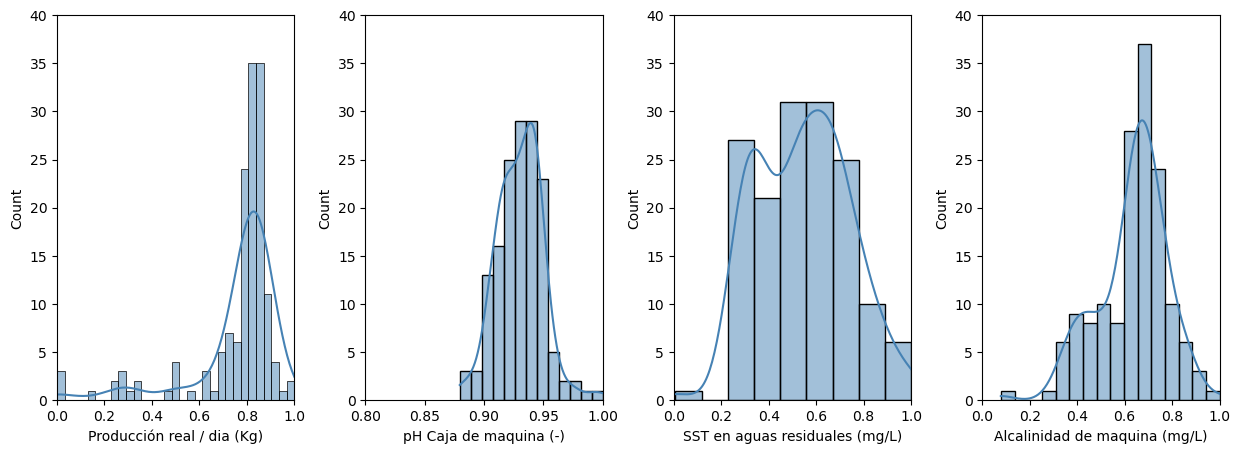

In [54]:
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(15, 5)
fig.subplots_adjust(wspace=0.3)

ax1=sns.histplot(x=databa['Producción real / dia (Kg)'],kde=True,color="steelblue",ax=axs[0])
#ax1=sns.swarmplot(x=data['PUNT_MAT'],color='black',ax=axs[0])
ax1.set(xlim=(0, 1))
ax1.set(ylim=(0, 40))

ax2=sns.histplot(x=databa['pH Caja de maquina (-)'],kde=True,color="steelblue",ax=axs[1])
#ax2=sns.swarmplot(x=data['PUNT_GLOB'],color='black',ax=axs[0])
ax2.set(xlim=(0.8, 1))
ax2.set(ylim=(0, 40))

ax3=sns.histplot(x=databa['SST en aguas residuales (mg/L)'],kde=True,color="steelblue",ax=axs[2])
#ax3=sns.swarmplot(x=data['NOTA_DEF'],color='black',ax=axs[0])
ax3.set(xlim=(0, 1))
ax3.set(ylim=(0, 40))

ax4=sns.histplot(x=databa['Alcalinidad de maquina (mg/L)'],kde=True,color="steelblue",ax=axs[3])
#ax3=sns.swarmplot(x=data['NOTA_DEF'],color='black',ax=axs[0])
ax4.set(xlim=(0, 1))
ax4.set(ylim=(0, 40))

plt.show()  